# Apsorpcija u kontinuumu u realisticnom modelu atmosfere Sunca

In [17]:
import numpy as np
import matplotlib.pyplot as plt 

default_figsize = [6,4]

In [50]:
import matplotlib
font = {'size'   : 12}

matplotlib.rc('font', **font)

Danas radimo jednu praktičnu / numeričku vežbu. Radićemo sa poznatim
“FALC” modelom atmosfere sunce. Model atmosfere je u stvari tabela vred-
nosti raznih fizičkih parametara. Model se nalazi u fajlu “f alc 7 1.dat”. Svaka
vrsta sadrži vrednost parametera za jedan “sloj” atmosfere. Svaka kolona
sadrži vrednosti za jedan specifičan parametar. Za nas su važne sledeće
kolone:

• 0-ta kolona: Optička dubina u kontinuumu, u logaritamskoj skali.

• 1-a kolona: Visina u odnosu na “površinu” fotosfere.

• 2-a kolona: Temperatura

• 3-a kolona: Ukupan pritisak gasa

• 4-a kolona: Elektronski pritisak

Pažnja: sve jedinice su u tzv. CGS sistemu jedinica!

In [26]:
atmos = np.loadtxt("falc_71.dat",unpack=True, skiprows=1)

In [27]:
atmos.shape

(12, 71)

In [28]:
print (atmos[0])

[-6.  -5.9 -5.8 -5.7 -5.6 -5.5 -5.4 -5.3 -5.2 -5.1 -5.  -4.9 -4.8 -4.7
 -4.6 -4.5 -4.4 -4.3 -4.2 -4.1 -4.  -3.9 -3.8 -3.7 -3.6 -3.5 -3.4 -3.3
 -3.2 -3.1 -3.  -2.9 -2.8 -2.7 -2.6 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9
 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5
 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
  1. ]


In [29]:
# Ovo je logaritam REFERENTNE opticke dubine. To je nasa nova vertikalna koordinata

In [30]:
# Nama je malo prirodnije da koristimo fizicku visinu kao koordinatu, to ce biti 
# prva kolona 

In [31]:
print (atmos[1])

[ 1.93172e+08  1.88911e+08  1.83647e+08  1.77401e+08  1.70098e+08
  1.61554e+08  1.51650e+08  1.40890e+08  1.29778e+08  1.18787e+08
  1.08474e+08  9.93517e+07  9.12703e+07  8.41617e+07  7.79691e+07
  7.26149e+07  6.83225e+07  6.49652e+07  6.24449e+07  6.01918e+07
  5.82352e+07  5.64751e+07  5.47957e+07  5.32545e+07  5.17269e+07
  5.02918e+07  4.88567e+07  4.74615e+07  4.60818e+07  4.47021e+07
  4.33437e+07  4.19885e+07  4.06332e+07  3.92719e+07  3.78941e+07
  3.65164e+07  3.51386e+07  3.37408e+07  3.23355e+07  3.09301e+07
  2.95169e+07  2.80798e+07  2.66426e+07  2.52055e+07  2.37385e+07
  2.22659e+07  2.07932e+07  1.92830e+07  1.77369e+07  1.61710e+07
  1.45939e+07  1.29971e+07  1.13843e+07  9.76753e+06  8.15628e+06
  6.58528e+06  5.04006e+06  3.59332e+06  2.28181e+06  1.07116e+06
 -1.20486e+04 -9.96723e+05 -1.88820e+06 -2.67711e+06 -3.41311e+06
 -4.11612e+06 -4.79225e+06 -5.45012e+06 -6.10207e+06 -6.74822e+06
 -7.39408e+06]


In [32]:
# voleli bismo da radimo u km

In [33]:
h = atmos[1] / 1E5

In [34]:
# Ovo h ce nam biti skala za vizuelizaciju podataka

In [35]:
logtau = atmos[0]
tau = 10. ** logtau

Text(0, 0.5, '$\\tau$')

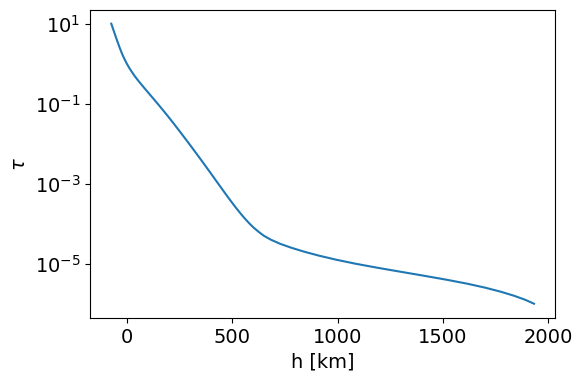

In [36]:
plt.figure(figsize=default_figsize)
plt.semilogy(h, tau)
plt.xlabel("h [km]")
plt.ylabel("$\\tau$")

In [37]:
# Sta bi bilo h = 0 km? To treba da bude neka referentna visina u atmosferi. 
# Uglavnom (99% slucajeva) uzimamo da je h=0 km tamo gde je tau = 1 na referentnoj
# talasnoj duzini

In [38]:
# Iz nekog razloga, opticka dubina na log skali se ponasa kao visina
# Zato cesto plotujemo strukturu zvezdanih atmosfera na skali log tau!!!

In [39]:
T = atmos[2]

Text(0, 0.5, 'T [K]')

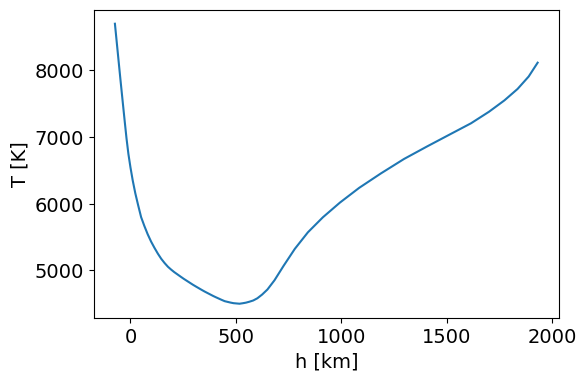

In [40]:
plt.figure(figsize=default_figsize)
plt.plot(h, T)
plt.xlabel("h [km]")
plt.ylabel("T [K]")

Text(0, 0.5, 'Pritisak gasa [Pa]')

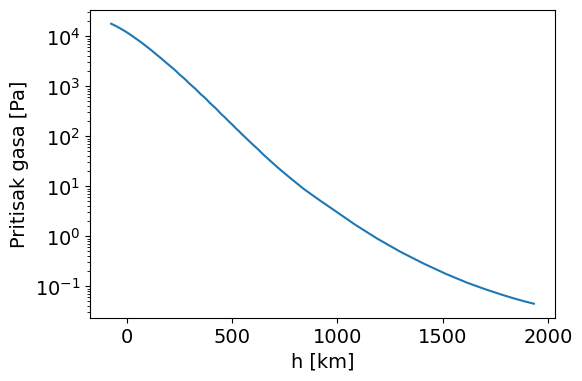

In [41]:
pg = atmos[3] / 10. # konverzija iz dyne / cm^2 u Pa
plt.figure(figsize=default_figsize)
plt.semilogy(h, pg)
plt.xlabel("h [km]")
plt.ylabel("Pritisak gasa [Pa]")

In [42]:
pe = atmos[4]

Text(0, 0.5, 'Pritisak elektrona [Pa]')

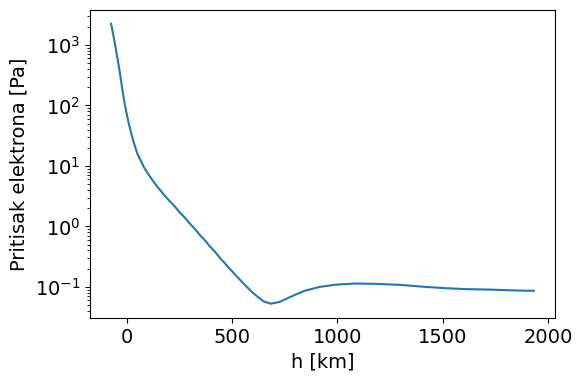

In [43]:
plt.figure(figsize=default_figsize)
plt.semilogy(h, pe)
plt.xlabel("h [km]")
plt.ylabel("Pritisak elektrona [Pa]")

## Pitanje 2

Pod pretpostavkom Lokalne Termodinamičke ravnoteže, izračunajte
funkciju izvora za neki relevantan opseg talasnih dužina, za svaku dubinu i uporedite rezultate. Prodiskutujte.

In [44]:
# Pitanje za 6-cu: Cemu je jednaka funkcija izvora u LTR? Jednaka je 
# PLANKOVOJ FUNKCIJIIII # Plankova funkcija zavisid od lambda i T 

def planck(llambda, T):
    h = 6.626E-34
    c = 2.997E8
    k = 1.38E-23
    
    B = 2*h*c*c / llambda**5.0 / (np.exp(h*c/llambda/k/T) - 1)
    
    return B

In [45]:
llambda = np.linspace(100,1000,10) # nm! hocemo u m, da bude SI
llambda *= 1E-9

In [46]:
S = planck(llambda[None,:], T[:,None])

In [47]:
S.shape

(71, 10)

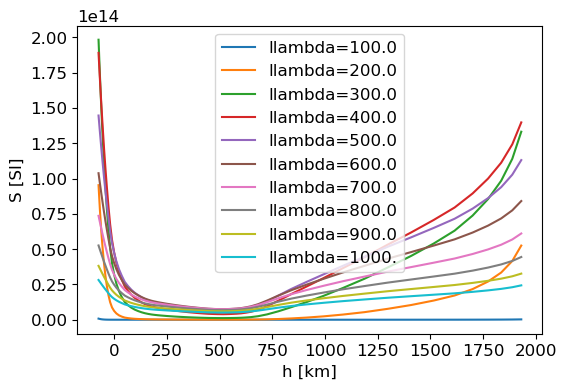

In [51]:
plt.figure(figsize=default_figsize)
for l in range(0,10):
    plt.plot(h, S[:,l],label='llambda='+str(llambda[l]*1E9)[:5])
plt.xlabel("h [km]")
plt.ylabel("S [SI]")
plt.legend()

Text(0, 0.5, 'S [SI]')

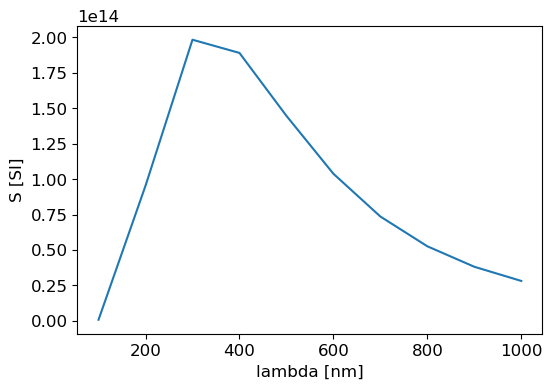

In [52]:
# Da se uverimo da S jako zavisi od llambda, mali plot:
plt.figure(figsize=default_figsize)
plt.plot(llambda*1E9, S[-1,:])
plt.xlabel("lambda [nm]")
plt.ylabel("S [SI]")

In [53]:
# Normirajmo svaku funkciju izvora u odnosu na njenu maksimalnu vrednost! 

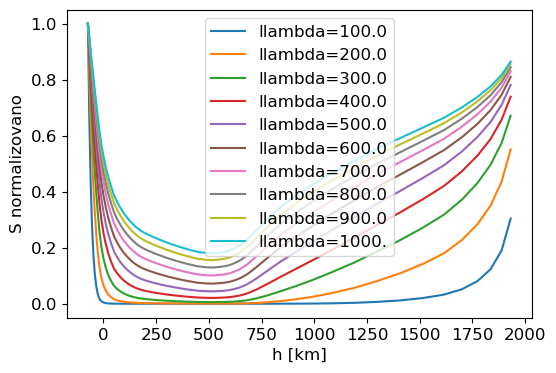

In [55]:
plt.figure(figsize=default_figsize)
for l in range(0,10):
    plt.plot(h, S[:,l]/np.amax(S[:,l]),label='llambda='+str(llambda[l]*1E9)[:5])
plt.xlabel("h [km]")
plt.ylabel("S normalizovano")
plt.legend()

In [31]:
# Sledeci korak bi bio da nadjemo neprozracnost na svim ovim talasnim duzinama
# da bismo nasli skalu optickih dubina, dabismo integralili JPZ, da bismo dobili 
# spektar!

# Medjutim, naci neprozracnost je jako tesko...

# Ako se zadrzimo na nH, nH- and ne

In [32]:
# Rekli smo da pg = Nt*k*T 

In [56]:
k = 1.38E-23
Nt = pg / k / T
print (Nt)

[4.00914745e+17 4.56944461e+17 5.39550972e+17 6.64308469e+17
 8.59848739e+17 1.18611224e+18 1.80925329e+18 3.00676911e+18
 5.34742626e+18 1.01446379e+19 1.97104144e+19 3.76725705e+19
 6.68950074e+19 1.13751515e+20 1.93399145e+20 3.13396907e+20
 4.73410320e+20 6.54439002e+20 8.47371507e+20 1.04612956e+21
 1.26283155e+21 1.49061104e+21 1.74216587e+21 2.03265324e+21
 2.33377792e+21 2.69918363e+21 3.06391669e+21 3.51724985e+21
 4.00294982e+21 4.48638831e+21 5.17410247e+21 5.88669844e+21
 6.59327862e+21 7.40588435e+21 8.51130750e+21 9.60602563e+21
 1.06901935e+22 1.22230190e+22 1.39115773e+22 1.55818138e+22
 1.74716809e+22 2.00593604e+22 2.26156843e+22 2.51412190e+22
 2.87897817e+22 3.26067377e+22 3.63729106e+22 4.08725342e+22
 4.60384884e+22 5.19470838e+22 5.82026931e+22 6.51278259e+22
 7.29099701e+22 8.10199162e+22 8.97143568e+22 9.85247782e+22
 1.07152320e+23 1.14861846e+23 1.22196962e+23 1.28185957e+23
 1.32849374e+23 1.37188088e+23 1.39110534e+23 1.40884616e+23
 1.42337841e+23 1.436080

In [57]:
def resi_ne(Nt, T):
    
    h = 6.626E-34
    k = 1.38E-23
    me = 9.1E-31
    Ei = 13.6 * 1.6E-19 
    
    KT = (2.0 * 3.14 * me * k * T / h / h) ** 1.5 * np.exp(-Ei/k/T)
    
    ne = -KT + np.sqrt(KT*KT + Nt * KT)
    
    return ne

In [58]:
# "Nase" ne

ne_samo_H = resi_ne(Nt, T)

In [59]:
n_H_ukupno = Nt - ne_samo_H

stepen_jonizacije = ne_samo_H / n_H_ukupno 

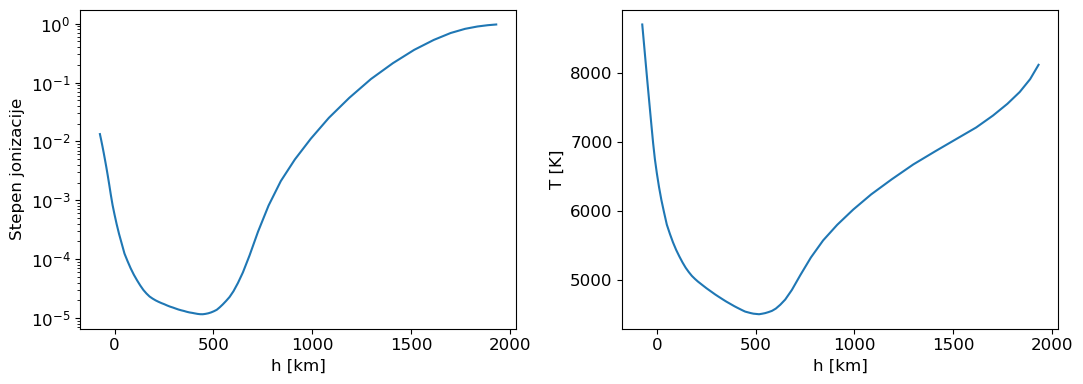

In [64]:
plt.figure(figsize=[11,4])
plt.subplot(121)
plt.semilogy(h, stepen_jonizacije)
plt.xlabel("h [km]")
plt.ylabel("Stepen jonizacije")
plt.subplot(122)
plt.plot(h, T)
plt.xlabel("h [km]")
plt.ylabel("T [K]")
plt.tight_layout()

## Sta je sada ovo? Temperatura u fotosferi i hromosferi je ista ali je stepen jonizacije POTPUNO drugaciji. Kako to?

Stepen jonizacije zavisi i od temperature i od koncentracije cestica. Za velike koncetrancije imamo mnogo rekombinacija pa je stepe jonizacije menji nego u hromosferi! 

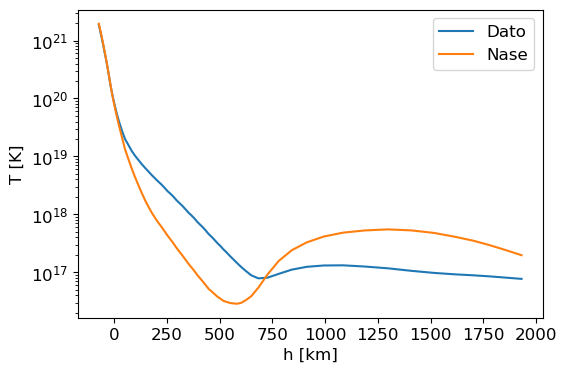

In [66]:
# Uporedimo nase ne, sa ne datim u modelu atmosfere
ne = pe / 10.0 / k / T
plt.figure(figsize=default_figsize)
plt.semilogy(h, ne, label='Dato')
plt.semilogy(h, ne_samo_H, label = 'Nase')
plt.xlabel("h [km]")
plt.ylabel("T [K]")
plt.legend()

### Zasto ovo ovako izgleda? 

- Na bas dubokim slojevima, vodonik je solidno jonizovan (1%), pa svi elektroni u principu dolaze od njega
- Na visim slojevima vodonik je slabo jonizovan, pa elektroni uglavnom dolaze od metala, koje mi nemamo :(
- Na najvisim slojevima, svi e- bi trebalo da dodju od vodonika, ali je vodonik manje jonizovan nego sto Sahina raspodela sugerise, usled ne-LTR efekata

## Pre sledeceg zadatka, vratimo se na opticku dubinu. Zasto izgleda ovako:

Text(0, 0.5, '$\\tau$')

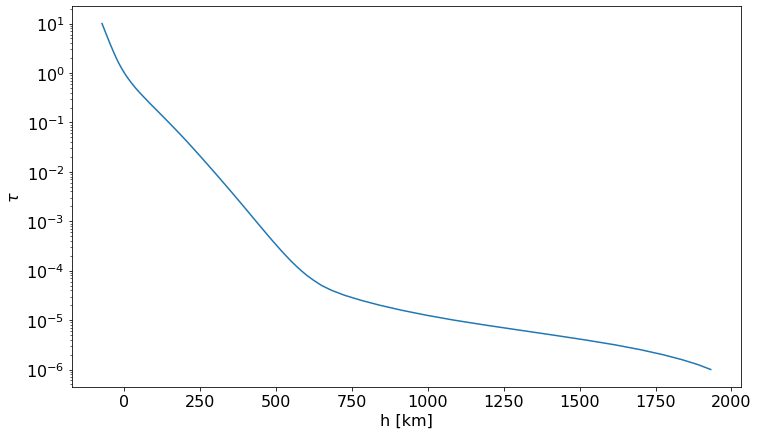

In [66]:
plt.figure(figsize=[12,7])
plt.semilogy(h, tau)
plt.xlabel("h [km]")
plt.ylabel("$\\tau$")

### Sledeci zadatak! Resavamo JPZ na 500 nm na datoj skali opticke dubine, da dobijemo izlazni intenzitet! 

Text(0, 0.5, 'S [SI]')

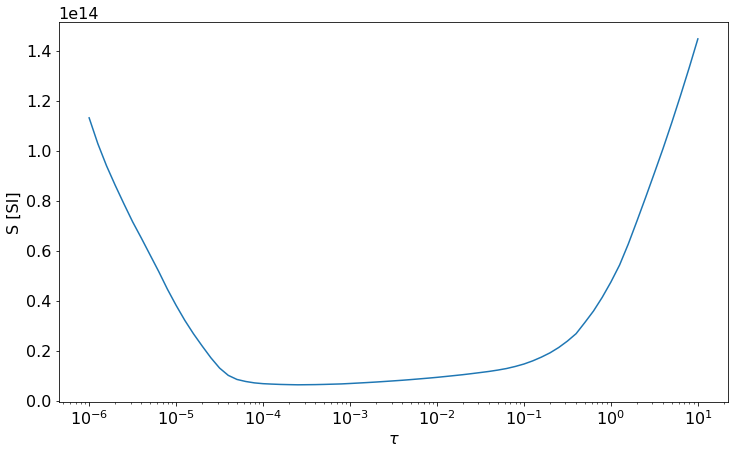

In [71]:
plt.figure(figsize=[12,7])
plt.semilogx(tau, S[:,4])
plt.xlabel("$\\tau$")
plt.ylabel("S [SI]")

## Resavanje jednacine prenosa zracenja znaci resavanje integrala:

## $$I^+ = \int_0^{\infty} S(t) e^{-t} dt$$

In [70]:
## Hajde da isplotujemo S(t) e^{-t}

Text(0, 0.5, 'S [SI]')

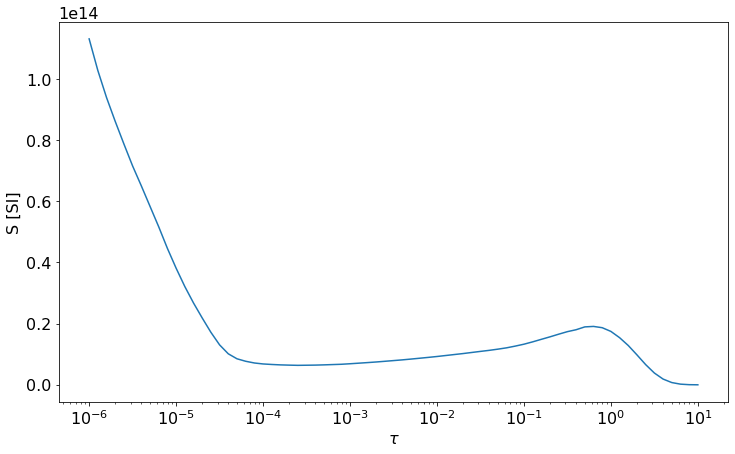

In [72]:
plt.figure(figsize=[12,7])
plt.semilogx(tau, S[:,4]*np.exp(-tau))
plt.xlabel("$\\tau$")
plt.ylabel("S [SI]")

In [73]:
## Ovde ima jedna zamka, prebacujemo integral u skalu logtau

## $$I^+ = \int_0^{\infty} S(t) e^{-t} t d\ln t$$

Text(0, 0.5, 'S [SI]')

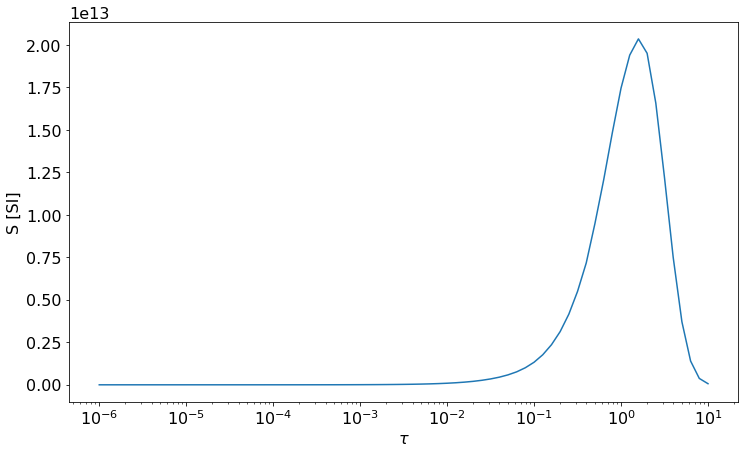

In [75]:
plt.figure(figsize=[12,7])
plt.semilogx(tau, S[:,4]*np.exp(-tau)*tau)
plt.xlabel("$\\tau$")
plt.ylabel("S [SI]")

Text(0, 0.5, 'S [SI]')

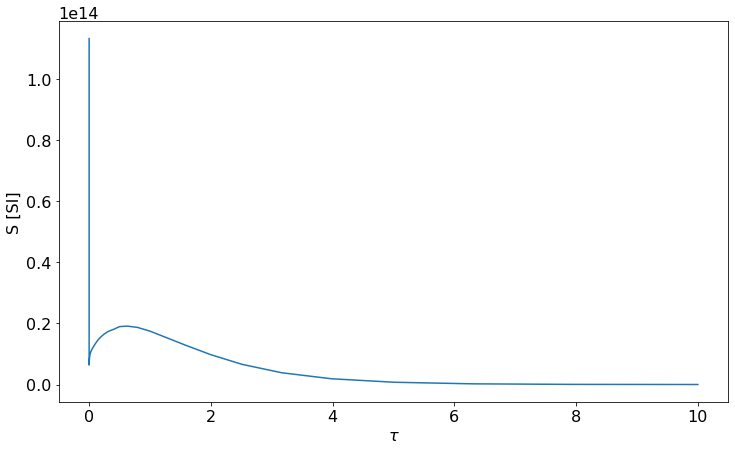

In [76]:
plt.figure(figsize=[12,7])
plt.plot(tau, S[:,4]*np.exp(-tau))
plt.xlabel("$\\tau$")
plt.ylabel("S [SI]")

## Sada bismo, intiutitivno samo integralili poditegralnu funkciju, npr. trapezoidno, i cica-mica i gotova prica

## Ne, umesto toga cemo krenuti od najdubljeg sloja i resavati jednacinu prenosa sa pretpostavkom konstantne funkcije izvora, sloj po sloj.

## NE PRETPOSTAVLJAMO da je funkcija izvora svuda konstantna nego da je samo konstantna unutar datog sloja

In [77]:
def formalno_resenje(S, tau):
    
    ND = len(S)
    I = np.zeros(ND)
    
    # Krecemo od najdublje tacke
    I[ND-1] = S[ND-1] # Prakticno termodinamicka ravnoteza, radi dobro 
                      # ako je poslednja tacka na velikom tau
        
    for i in range(ND-1,0,-1):
        
        S_srednje = (S[i] + S[i-1]) * 0.5
        delta_tau = tau[i-1] - tau[i]
        
        I[i-1] = I[i] * np.exp(delta_tau) + S_srednje * (1.0 - np.exp(delta_tau))
    
    return I

In [79]:
I = formalno_resenje(S[:,4],tau)

In [84]:
print("%1.7e" % I[0])

4.2619691e+13


Text(0, 0.5, 'S [SI]')

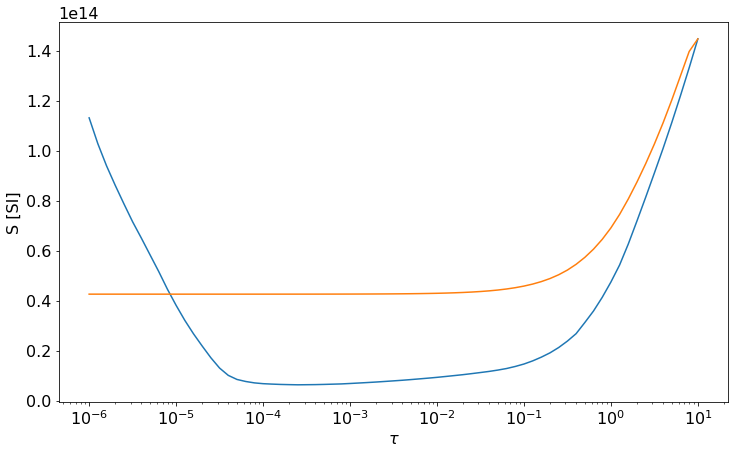

In [86]:
plt.figure(figsize=[12,7])
plt.semilogx(tau, S[:,4], label='S')
plt.semilogx(tau, I, label = 'Intenzitet')
plt.xlabel("$\\tau$")
plt.ylabel("S [SI]")

Text(0, 0.5, 'S [SI]')

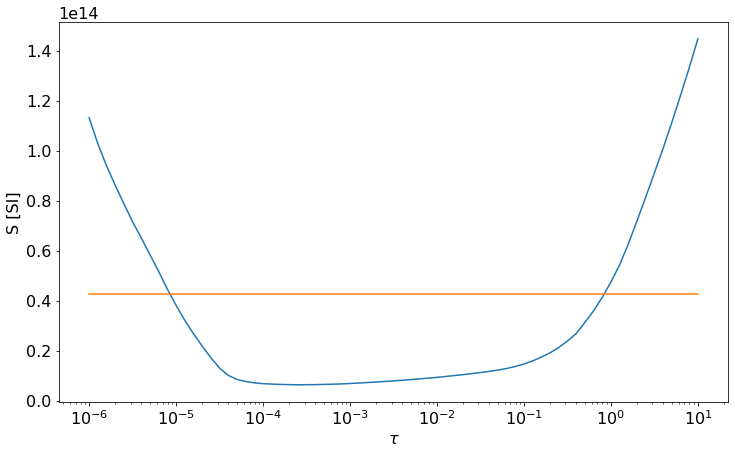

In [87]:
mock_I = np.zeros(len(I))
mock_I[:] = I[0]
plt.figure(figsize=[12,7])
plt.semilogx(tau, S[:,4], label='S')
plt.semilogx(tau, mock_I, label = 'Izlazni Intenzitet')
plt.xlabel("$\\tau$")
plt.ylabel("S [SI]")

## Sada uvodimo neko $r_\lambda$, koje nam govori kako se opticka dubina na drugim talasnim duzinama skalira u odnosu na ovu referentnu opticku dubinu, pa cemo onda resiti JPZ na svakoj od ovih skala optickih dubina

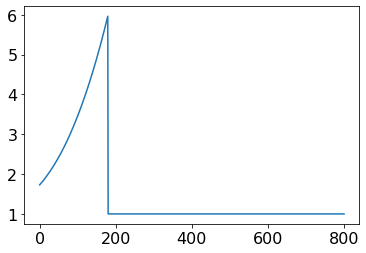

In [93]:
# Hajde da napravimo bas fensi-smesni r_lambda

llambda = np.linspace(200,1000,801)
r_lambda = np.ones(801)

# Dodajmo neki izmisljeni koeficijent apsorpcije usled jonizacije vodonika sa n = 2
balmerov_skok = 180

r_lambda[:balmerov_skok] += (llambda[:balmerov_skok] / llambda[balmerov_skok])**3.0 * 5.0

plt.plot(r_lambda)

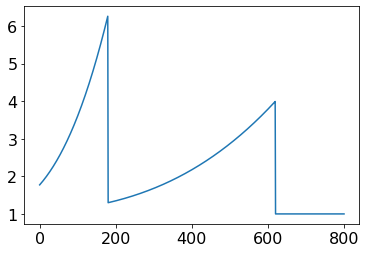

In [94]:
# Dodajmo mu i pasenov skok, jonizacija vodonika sa n = 3

pasenov_skok = 620
r_lambda[:pasenov_skok] += (llambda[:pasenov_skok] / llambda[pasenov_skok])**3.0 * 3.0
plt.plot(r_lambda)

In [104]:
r_lambda /= r_lambda[300]

In [95]:
# Izracunajmo funkciju izvora u LTR na svakoj talasnoj duzini za ovu novu 
# listu talasnih duzina:

In [100]:
S = planck(llambda[None,:]*1E-9, T[:,None])
S.shape

(71, 801)

In [101]:
I_lambda = np.zeros([71,801])

In [105]:
for l in range(0,801):
    I_lambda[:,l] = formalno_resenje(S[:,l], tau * r_lambda[l])

Text(0, 0.5, 'Iplus')

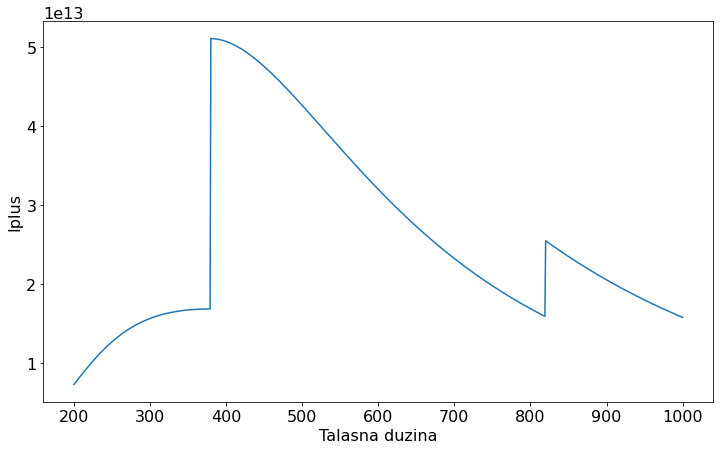

In [106]:
# NAS SPEKTAR!!!!

plt.figure(figsize=[12,7])
plt.plot(llambda,I_lambda[0])
plt.xlabel("Talasna duzina")
plt.ylabel("Iplus")